<a href="https://colab.research.google.com/github/arptoth/breast_cancer_prediction/blob/master/Breast_Cancer_Wisconsin_(Diagnostic)_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Diagnostics - Logistic Regression

## Load data

In [24]:
!pip install kaggle
!pip install ipython-autotime

%load_ext autotime

from getpass import getpass

key = getpass('Enter token here')

#Set the enviroment variables
import os
os.environ['KAGGLE_USERNAME'] = "arpadtoth"
os.environ['KAGGLE_KEY'] = key
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Enter token here··········
401 - Unauthorized
time: 13 s


In [25]:
import zipfile

zip_ref = zipfile.ZipFile('breast-cancer-wisconsin-data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

time: 6.35 ms


In [60]:
# import the relevant libraries
import pandas as pd
import numpy as np

time: 922 µs


In [61]:

raw_data = pd.read_csv('data.csv')
raw_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


time: 73.6 ms


# Get some summary about raw data

In [62]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [63]:
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1) 

time: 2.47 ms


## Data preprocessing

Great! There are no missing data. However, we need to map the diagnosis column to 0 and 1. Also, some feature scaling is needed. 

## Map target column to 0 and 1

In [64]:
df = raw_data.copy()
df['diagnosis'] = [1 if b=='M' else 0 for b in df.diagnosis]
#df['diagnosis'].map({'M': '1', 'B': '0'})
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


time: 58.7 ms


## Balancing data

Let's look at the target column ratio.

In [65]:
df['diagnosis'].value_counts()


0    357
1    212
Name: diagnosis, dtype: int64

time: 5.64 ms


In [66]:
df['diagnosis'].value_counts()/df['diagnosis'].count()

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

time: 5.71 ms


## Upsample maligant class

It's seems the ratio is 62-38%. We accept at least 45-55 so we need to balance the data. 

In [67]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.diagnosis==0]
df_minority = df[df.diagnosis==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=357,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.diagnosis.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

time: 13.9 ms


In [68]:
unscaled_inputs = df.iloc[:,2:]

time: 1.74 ms


In [69]:
targets = df.iloc[:,1:2]

time: 3.02 ms


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(unscaled_inputs)

time: 6.67 ms


In [71]:
from sklearn.model_selection import train_test_split

# check how this method works
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size=0.8)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)
time: 6.02 ms


In [72]:
# import the LogReg model from sklearn
from sklearn.linear_model import LogisticRegression

# import the 'metrics' module, which includes important metrics we may want to use
from sklearn import metrics

time: 1.08 ms


In [73]:
reg = LogisticRegression()

reg.fit(x_train,y_train)

reg.score(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.989010989010989

time: 10.9 ms


In [74]:
model_outputs = reg.predict(x_test)

print(model_outputs.shape, y_test.shape)

model_outputs==y_test.T

(114,) (114, 1)


,316,154,352,267,58,29,493,350,175,373,229,436,67,177,476,191,568,199,5,144,541,257,236,138,211,118,6,275,357,223,19,363,296,391,97,297,475,395,14,359,...,289,131,343,305,472,260,244,320,555,80,79,42,173,346,461,473,291,366,120,401,554,385,512,127,328,519,481,203,152,560,185,333,281,23,28,561,458,210,65,13
diagnosis,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


time: 206 ms


In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_outputs)

time: 4.1 ms


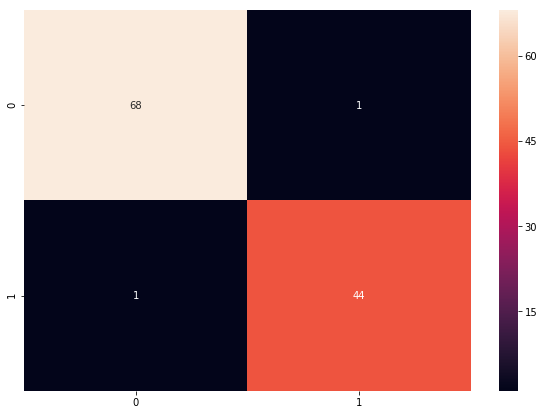

time: 233 ms


In [76]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)